**Created on 03/01/2022**

**Group 2**

**Authors: LaurianeBompay**

**License: this code is released under the CeCILL 2.1 license. See
https://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt**


In [1]:
import os
import sys
import math
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [ ]:
#data importation 
data_1 = pd.read_csv("Dataset_complete.csv")
data_0 = pd.read_csv("positions.csv")

In [ ]:
extract_orientation = data_0[['node_id','orientation']]
extract_orientation.rename(columns={"node_id": "target"}, inplace=True)
data_1 = data_1.merge(extract_orientation,how='left', on = 'target')

In [ ]:
len(data_1) #number of data

3946

In [ ]:
#data types
data_1.dtypes

initiator                  int64
target                     int64
protocol                  object
nlos_indicator           float64
t1                         int64
t2                         int64
t3                         int64
t4                         int64
skew                     float64
tof                        int64
tof_skew                 float64
range                    float64
range_skew               float64
ranging_unit              object
ranging_error            float64
loc_initiator_x          float64
loc_initiator_y          float64
loc_initiator_z          float64
loc_target_x             float64
loc_target_y             float64
loc_target_z             float64
distance                 float64
course_dist              float64
temperature_initiator    float64
temperature_target       float64
timestamp                  int64
seqnum                     int64
rssi_request             float64
rssi_ack                 float64
rssi_data                float64
rssi_mean 

In [ ]:
#quartiles, min and max
data_1.describe()

,initiator,target,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,...,distance,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean
count,3946.0,3946.000000,3946.000000,3.946000e+03,3.946000e+03,3.946000e+03,3.946000e+03,3946.000000,3946.000000,3946.000000,...,3946.000000,3946.000000,3946.000000,3946.000000,3.946000e+03,3946.00000,3946.000000,3946.000000,3946.000000,3946.000000
mean,183.0,148.315256,7.215384,5.505930e+11,5.509284e+11,5.510320e+11,5.506966e+11,-2.755970,999.946275,1142.269047,...,5.312293,3.617079,39.577380,39.555326,1.654930e+12,2200.96072,-inf,-inf,-inf,-inf
std,0.0,35.805126,19.476255,3.164409e+11,3.164412e+11,3.164412e+11,3.164409e+11,3.762459,674.344209,646.710484,...,2.936111,2.026785,2.341864,3.782210,3.017928e+05,1216.14462,NaN,NaN,NaN,NaN
min,183.0,100.000000,0.000000,6.062043e+07,2.633300e+08,3.679996e+08,1.652910e+08,-11.659438,-613.000000,-152.480214,...,0.000000,0.000000,30.410000,27.559999,1.654930e+12,1.00000,-inf,-inf,-inf,-inf
25%,183.0,101.000000,2.956510,2.778704e+11,2.782606e+11,2.783633e+11,2.779731e+11,-5.783573,655.250000,715.863760,...,3.323000,1.899738,38.959999,36.680000,1.654930e+12,1174.25000,-79.967224,-79.988684,-79.884079,-79.886862
50%,183.0,171.000000,3.524929,5.528798e+11,5.532044e+11,5.533074e+11,5.529824e+11,-1.784294,898.000000,998.316717,...,4.639000,3.699628,40.384998,39.340000,1.654930e+12,2231.50000,-79.230034,-79.305238,-79.218111,-79.237715
75%,183.0,180.000000,4.342234,8.238901e+11,8.243201e+11,8.244236e+11,8.239937e+11,0.338401,1222.000000,1355.367840,...,6.312000,5.399282,41.240002,42.380001,1.654931e+12,3251.75000,-78.659598,-78.701023,-78.666953,-78.686799
max,183.0,184.000000,342.462982,1.099128e+12,1.099376e+12,1.099479e+12,1.099231e+12,4.829899,2636.000000,2860.190262,...,12.722000,6.999961,42.380001,47.320004,1.654931e+12,4260.00000,-77.162437,-77.516188,-77.428716,-77.478065


In [ ]:
#print of unique value in each columns of data frame
for column in data_1:
    print("Nombre de valeurs uniques pour ", column, ' : ', len(data_1[column].unique()))

Nombre de valeurs uniques pour  initiator  :  1
Nombre de valeurs uniques pour  target  :  6
Nombre de valeurs uniques pour  protocol  :  1
Nombre de valeurs uniques pour  nlos_indicator  :  3937
Nombre de valeurs uniques pour  t1  :  3946
Nombre de valeurs uniques pour  t2  :  3946
Nombre de valeurs uniques pour  t3  :  3946
Nombre de valeurs uniques pour  t4  :  3946
Nombre de valeurs uniques pour  skew  :  446
Nombre de valeurs uniques pour  tof  :  1461
Nombre de valeurs uniques pour  tof_skew  :  3946
Nombre de valeurs uniques pour  range  :  1461
Nombre de valeurs uniques pour  range_skew  :  3945
Nombre de valeurs uniques pour  ranging_unit  :  1
Nombre de valeurs uniques pour  ranging_error  :  983
Nombre de valeurs uniques pour  loc_initiator_x  :  71
Nombre de valeurs uniques pour  loc_initiator_y  :  71
Nombre de valeurs uniques pour  loc_initiator_z  :  1
Nombre de valeurs uniques pour  loc_target_x  :  6
Nombre de valeurs uniques pour  loc_target_y  :  6
Nombre de valeurs 

On pourrait enlever toutes les colonnes qui contiennes qu'une seule valeur : initiator, protocol, ranging_unit et loc_initiator_z

## <center> Tracé des positions </center>

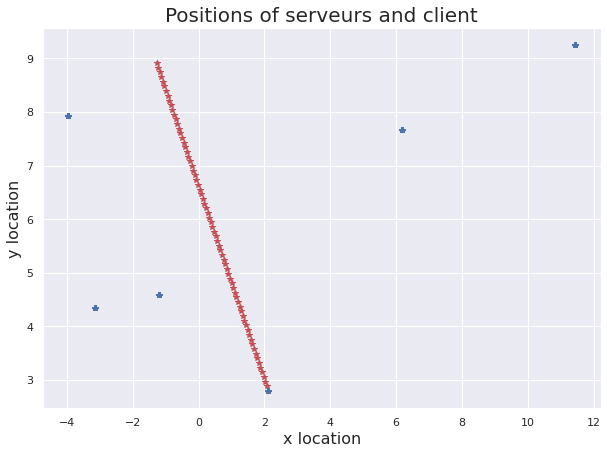

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(data_1['loc_initiator_x'].value_counts().index,data_1['loc_initiator_y'].value_counts().index,'*r')
plt.plot(data_1['loc_target_x'],data_1['loc_target_y'],"*b")
plt.xlabel("x location", fontsize=16)
plt.ylabel("y location", fontsize=16)
plt.title('Positions of serveurs and client', fontsize=20);

On retrouve bel et bien le schéma qui nous a été donné.

## <center> Données qualitatives </center>

Les données qualitatives sont dans les colonnes ranging_unit et register_dump_CIR.

In [ ]:
data_1['ranging_unit'].value_counts()

m    3946
Name: ranging_unit, dtype: int64

ranging_unit est toujours 'm'. On peut enlever cette colonne

Comme vu plus haut, pour register_dump_CIR, les valeurs sont toutes différentes. Mais comme on ne sait pas vraiment ce que c'est, on va enlever cette variable aussi.

## <center>Suppression des variables</center>

In [ ]:
data_1.drop('ranging_unit', axis=1, inplace=True)
data_1.drop('register_dump_CIR', axis=1, inplace=True)
data_1.drop('initiator', axis=1, inplace=True)
data_1.drop('protocol', axis=1, inplace=True)
data_1.drop('loc_initiator_z', axis=1, inplace=True)

## <center>Corrélations entre les variables quantitatives </center>

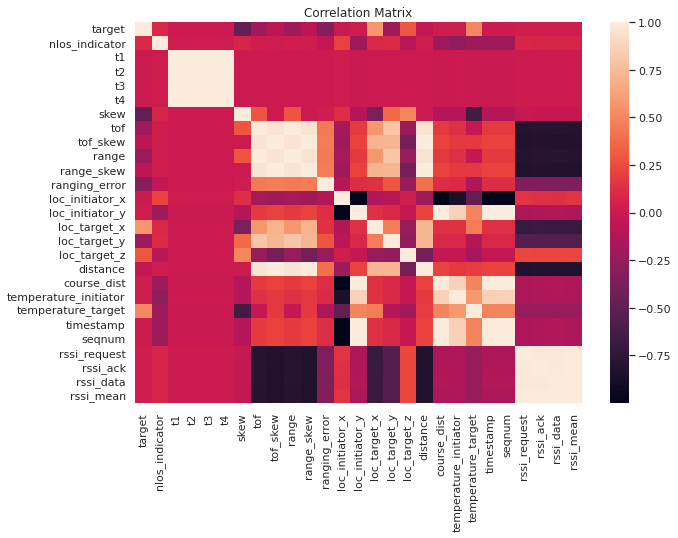

In [ ]:
#ploting the correlations 
plt.figure(figsize=(10, 7))
corr_data = data_1.corr()
sns.heatmap(corr_data)
plt.title('Correlation Matrix')
plt.show()

### <center>Nuage de points des differentes variables corrélées</center>

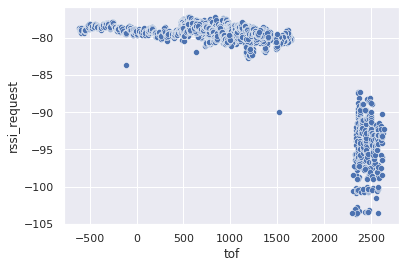

In [ ]:
#rssi_request by tof
sns.scatterplot(x="tof", y="rssi_request", data=data_1)
plt.show()

On dirait qu'il y a bien un lien ( 1/x )?


<AxesSubplot:xlabel='tof', ylabel='rssi_ack'>

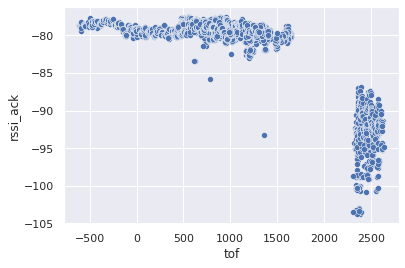

In [ ]:
#rssi_ack by tof
sns.scatterplot(x="tof", y="rssi_ack", data=data_1)
plt.show()

On dirait qu'il y a bien un lien ( 1/x )?


<AxesSubplot:xlabel='tof', ylabel='rssi_data'>

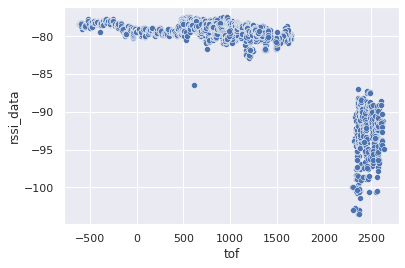

In [ ]:
#rssi_data by tof
sns.scatterplot(x="tof", y="rssi_data", data=data_1)
plt.show()

On dirait qu'il y a bien un lien ( 1/x )?


<AxesSubplot:xlabel='tof', ylabel='range'>

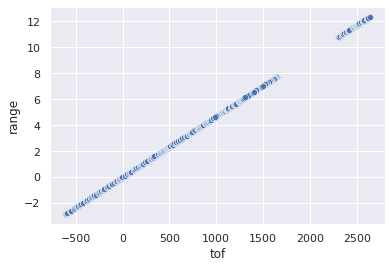

In [ ]:
#range by tof
sns.scatterplot(x="tof", y="range", data=data_1)
plt.show()

Lien très linéaire. C'est normal car range c'est la distance estimée et tof c'est le temps de trajet donc à vitesse constante, il est normal d'observer cette droite. On voit qu'il y a une zone de floue dans les données à 8m de distance et jusqu'à 10m environ.

<AxesSubplot:xlabel='tof', ylabel='range_skew'>

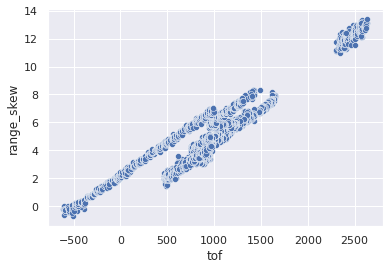

In [ ]:
#range_skew by tof
sns.scatterplot(x="tof", y="range_skew", data=data_1)
plt.show()

Ici aussi on voit une relation linéaire avec la même zone de floue. (range_skew c'est la distance estimée corrigée)

<AxesSubplot:xlabel='temperature_target', ylabel='skew'>

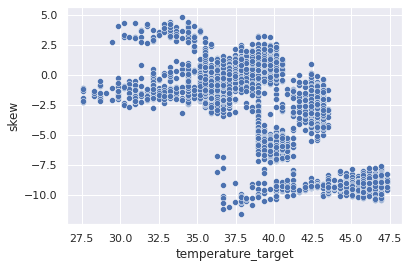

In [ ]:
#skew by temperature_target
sns.scatterplot(x="temperature_target", y="skew", data=data_1)
plt.show()

Ici le lien n'est pas clair et peu pertinent à interpreter

<AxesSubplot:xlabel='temperature_initiator', ylabel='loc_initiator_x'>

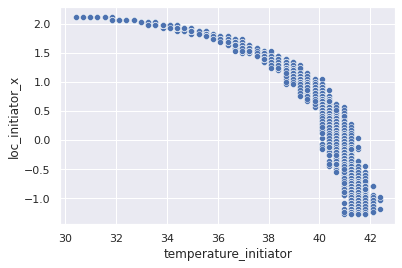

In [ ]:
#loc_initiator_x by temperature_initiator
sns.scatterplot(x="temperature_initiator", y="loc_initiator_x", data=data_1)
plt.show()

Ici on voit clairement un lien mais il ne semble pas linéaire.

<AxesSubplot:xlabel='temperature_initiator', ylabel='loc_initiator_y'>

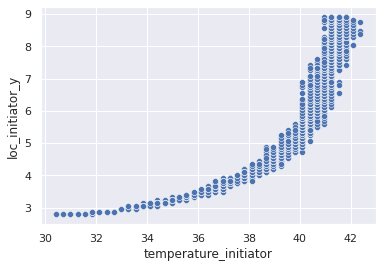

In [ ]:
#loc_initiator_y by temperature_initiator
sns.scatterplot(x="temperature_initiator", y="loc_initiator_y", data=data_1)
plt.show()

Ici on voit clairement un lien mais il ne semble pas linéaire.

<AxesSubplot:xlabel='temperature_initiator', ylabel='course_dist'>

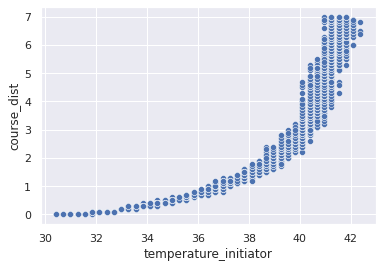

In [ ]:
#course_dist_y by temperature_initiator
sns.scatterplot(x="temperature_initiator", y="course_dist", data=data_1)
plt.show()

Ici on voit clairement un lien mais il ne semble pas linéaire.

<AxesSubplot:xlabel='temperature_initiator', ylabel='timestamp'>

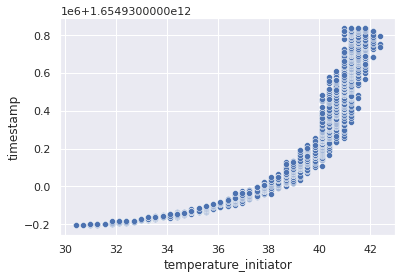

In [ ]:
#timestamp by temperature_initiator
sns.scatterplot(x="temperature_initiator", y="timestamp", data=data_1)
plt.show()

Ici on voit clairement un lien mais il ne semble pas linéaire.

## <center> Histogrammes des variables quantitatives </center>

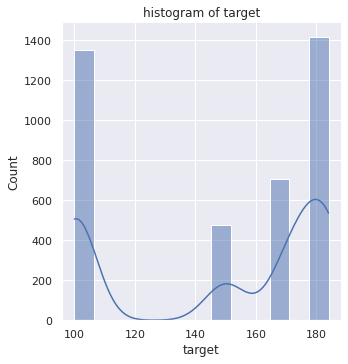

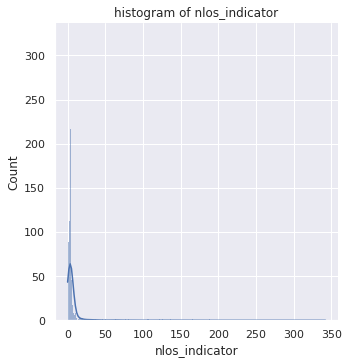

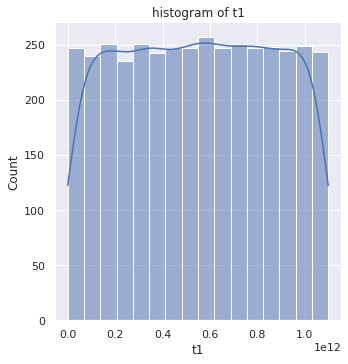

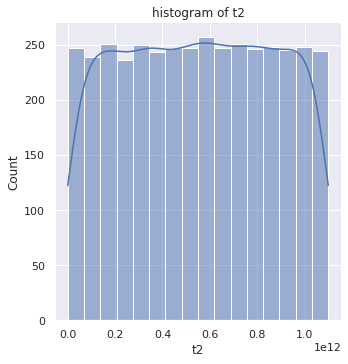

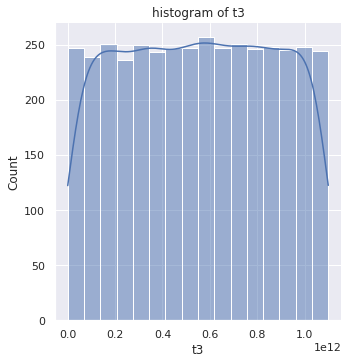

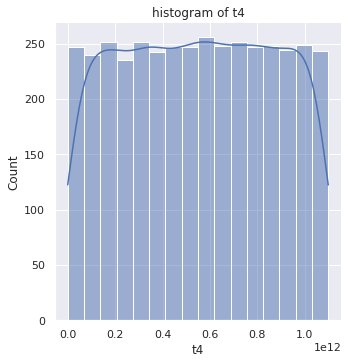

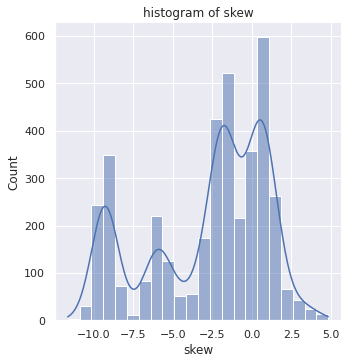

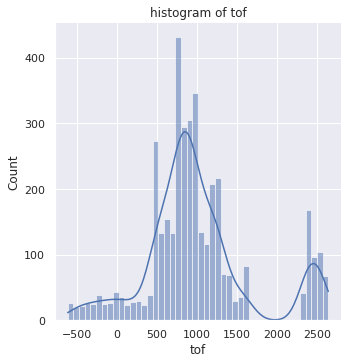

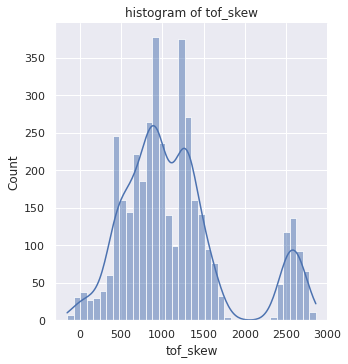

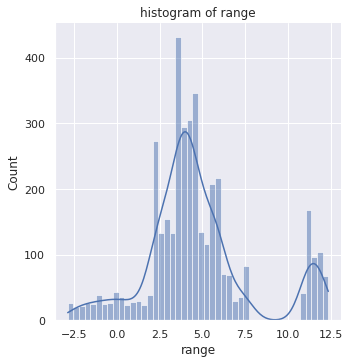

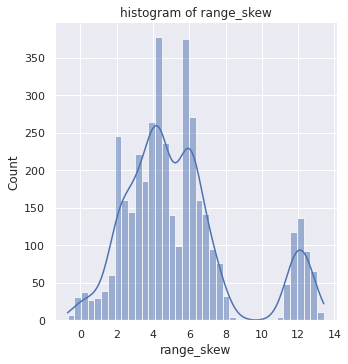

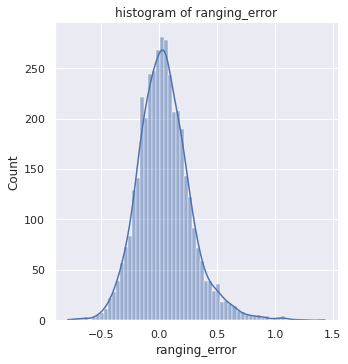

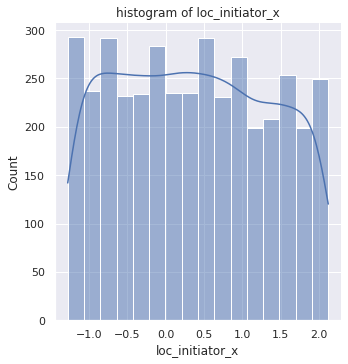

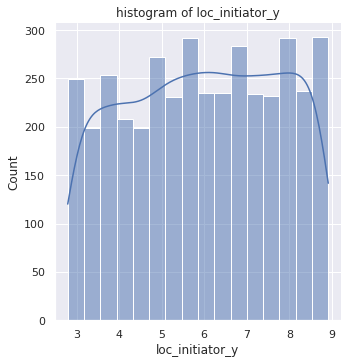

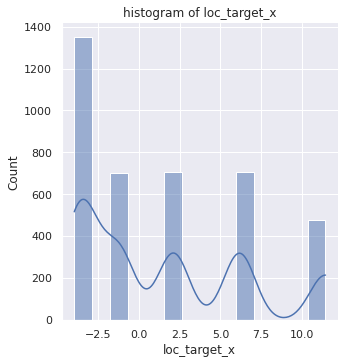

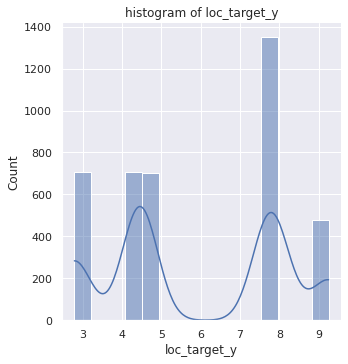

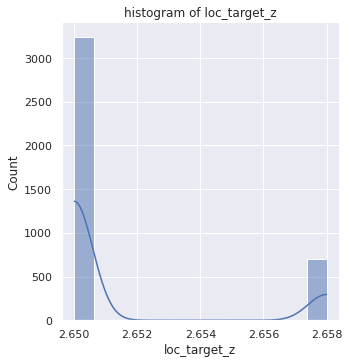

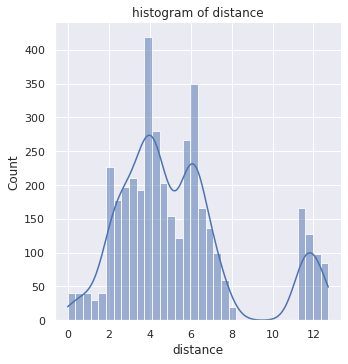

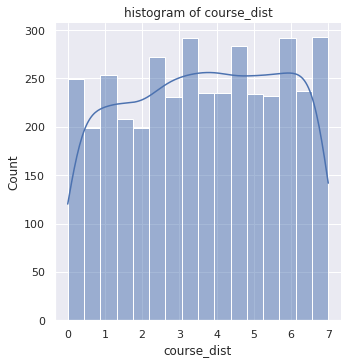

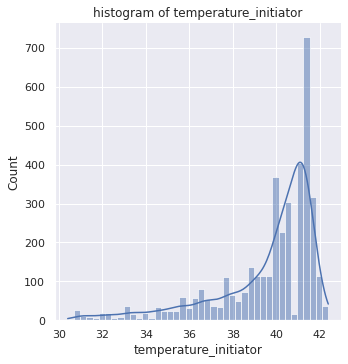

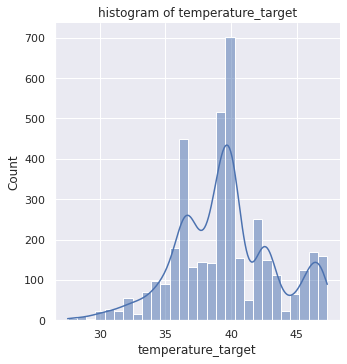

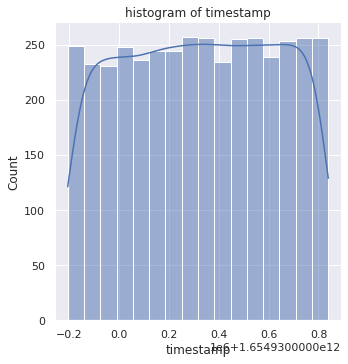

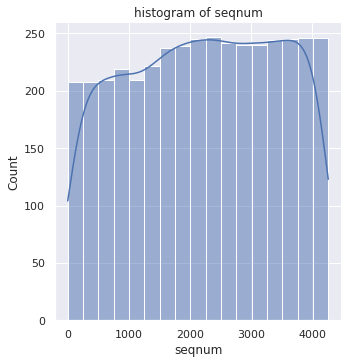

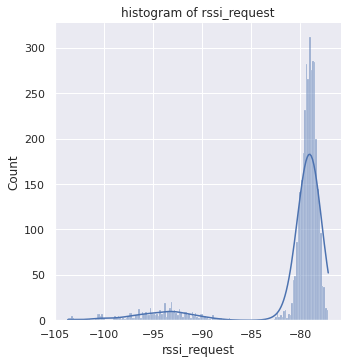

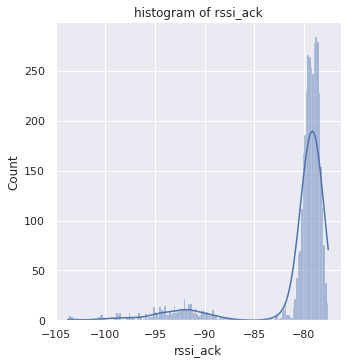

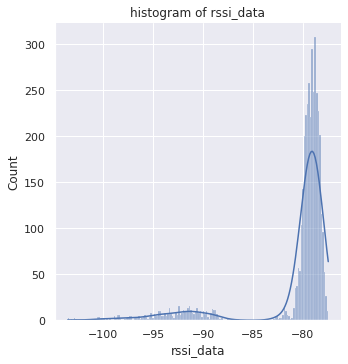

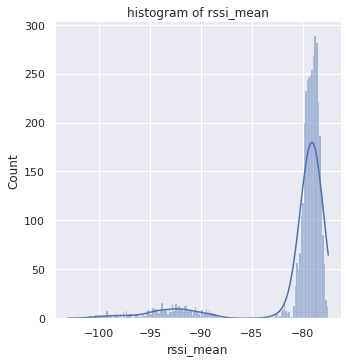

In [ ]:
for column in data_1.select_dtypes(['number']).columns :
    sns.displot(data=data_1[column], kde=True)
    plt.title("histogram of "+str(column))
    plt.show()

Le ranging_error semble être gaussien. On pourrait faire un test pour vérifier

In [ ]:
#importation of librarie needed for normality test
from scipy import stats

In [ ]:
shapiro_test = stats.shapiro(data_1['ranging_error'])
print('La pvalue associée au test de normalité est de ', shapiro_test.pvalue)

La pvalue associée au test de normalité est de  2.026492145321822e-26


Cette pvalue est <<0.05. On ne peut pas considérer que l'erreur d'estimation de la distance est normalement distribuée.